## Conditional Probability

All probabilities are conditional; whether or not it's written explicitly, there is always background knowledge (or assumptions) built into every probability. 

$$P(A|B) = \frac{P(A\cap B)}{P(B)}$$

- $P(A)$ the prior probability of A
- $P(A|B)$ the posterior probability of A

$$P(A \cap B) = P(B) P(A |B) = P(A) P(B|A)$$

__Bayes' rule__:
$$P(A|B) = \frac{P(B|A)P(A)}{P(B)}$$

In [3]:
# testing for a rare disease
accurate_rate = 0.95
decease_rate = 0.01

p_d_t = (accurate_rate * decease_rate)/((accurate_rate * decease_rate) + (1-accurate_rate)*(1-desease_rate))
p_d_t

0.16101694915254225

`Monty Hall`: Let $C_i$ be the event that the car is behind door $i$, for $i=1, 2, 3$. By the law of total probability:
$$P(\text{get car}) = P(\text{get car} | C_1) \cdot \frac{1}{3} + P(\text{get car} | C_2) \cdot \frac{1}{3} + P(\text{get car} | C_3 ) \cdot \frac{1}{3}$$

Let's assume the constestant picked door 1 (if she didn't pick door 1, we could simply relabel the doors), then we have:

- choose door 1:
    *  1/3: car is behind door 1
    *  1/3: car is behind door 2
    *  1/3: car is behind door 3

$$P(\text{get car}) = 0 \cdot \frac{1}{3} + 1 \cdot \frac{1}{3} + 1 \cdot \frac{1}{3} = \frac{2}{3}$$

Switching gets the car 2/3 of the time. Bayes' rule also works nicely for findgin the conditional probability of success suing the switching strategy, given the evidence. Suppose that Monty opends door 2:
$$P(C_1 | M_2) = \frac{P(M_2| C_1) P(C_1)}{P(M_2)} = \frac{(1/2)(1/3)}{1/2} = \frac{1}{3}$$
So given that Monty opens door 2, there is a 1/3 chance that the contestant's original choice of door has the car, which means that there is a 2/3 chance that the switching strategy will succeed.

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [4]:
def monty_hall(switch_doors, ndoors=3):
    """
    switch_doors: boolean
    """
    chosen_door = random.randint(1, ndoors)
    if switch_doors:
        # reveal a goat
        revealed_door = 3 if chosen_door == 2 else 2
        availabe_doors = [door for door in range(1, ndoors+1) if door not in (chosen_door, revealed_door)]
        chosen_door = random.choice(availabe_doors)  # switch
    return chosen_door == 1


def run_trials(ntrials, switch_doors, ndoors=3):
    """
    run n trials iterations of the Monty Hall problem with n doors, with and without switching.
    """
    nwins = 0
    for i in range(ntrials):
        if monty_hall(switch_doors, ndoors):
            nwins += 1
    return nwins


ndoors, ntrials = 3, 10000
wins_without_switch = run_trials(ntrials, False, ndoors)
wins_with_switch = run_trials(ntrials, True, ndoors)

print('Monty Hall Problem with {} doors'.format(ndoors))
print('Proportion of wins without switching: {:.4f}'
            .format(wins_without_switch/ntrials))
print('Proportion of wins with switching: {:.4f}'
            .format(wins_with_switch/ntrials))

Monty Hall Problem with 3 doors
Proportion of wins without switching: 0.3319
Proportion of wins with switching: 0.6740


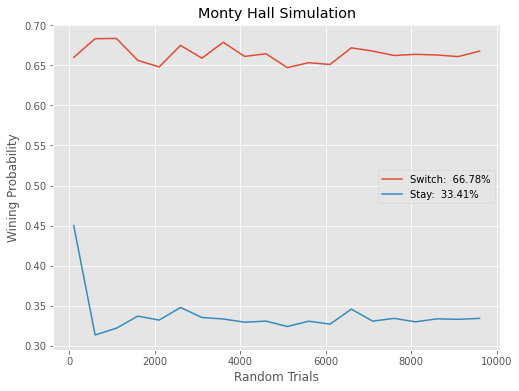

In [22]:
""# plot the probaility
trials = range(100, 10000, 500)
prob_switch = []
prob_stay = []
for i in trials:
    prob_switch.append(run_trials(i, True, 3)/i)
    prob_stay.append(run_trials(i, False, 3)/i)

plt.style.use('ggplot')   
plt.figure(figsize=(8, 6))
plt.plot(trials, prob_switch, label=f"Switch: {prob_switch[-1] : 0.2%}")
plt.plot(trials, prob_stay, label=f"Stay: {prob_stay[-1]: 0.2%}")
plt.title("Monty Hall Simulation")
plt.ylabel("Wining Probability")
plt.xlabel("Random Trials")
plt.legend()


`Gambler's ruin`: Two gamblers, A and B, make a sequence of 1 dollar bets. In each bet,

- A: has probability $p$ of winning
- B: has probabiltiy $1-p$ of winning
- Gambler A starts with $i$ dollars and gambler B starts with $N-i$ dollars, the total wealth is N.

We model this game as a _random walk_ on the integers between 0 and N, where $p$ is the probabiliyt of going to the right in the given stoep and $1-p$ is the probability of going to the left. 

__What is the probability that A wins the game (walking away with all the money)?__  Starting with $i$ dollars, our question then, is what is $P_i$

By LOTP(law of total probability), conditionaing on the outcome of the first round, we have:
$$P_i = P_{i+1} \cdot p + P_{i-1} \cdot q$$

Now we have a recurrence to solve (fundamentally it is a polynomial problem). Rewriting it, we obtain
$$pP_{i+1} - P_i + (1-p)P_{i-1} = 0$$

The characteristic equation of the difference equation is $px^2 - x + q  = px^2 - x +(1-p) = 0$, which has roots $1$ and $q/p$. If $p \neq 1/2$, these roots are distinct, and the general solution is:
$$p_i = a \cdot 1^i + b \cdot (\frac{q}{p})^i = a + b \cdot (\frac{1-p}{p})^i$$

Using the boundary conditions, $p_0 = 0$ since we've already lost, and $p_N = 1$ since we've already won. So, $0 = p_0 = a + b$, so $b = -a$. Also $p_N = 1$, so $1 = P_n = b \cdot (\frac{q}{p})^N + a$, we get:
$$a = - b = \frac{1}{1 - (q/p)^N}$$
Thus,
$$
\begin{align}
P_i & = \frac{(\frac{1-p}{p})^i}{(\frac{1-p}{p})^N - 1} - \frac{1}{(\frac{1-p}{p})^N - 1} \\
& = \frac{(\frac{1-p}{p})^i - 1}{(\frac{1-p}{p})^N - 1} \\
& \leq \frac{(\frac{1-p}{p})^i}{(\frac{1-p}{p})^N} \\
& = (\frac{p}{1-p})^{N-i}
\end{align} \tag{p $\neq 1/2$}
$$

When $p = 1/2$, $P_i = \frac{i}{N}$.

We could interpret our results as the probability that we gain $m$ before losing $n$ and sum is $T = n + m$, then we could have:
$$P_n = (\frac{p}{1-p})^m$$
Note that the last expression is even independent of $n$. It is also exponentially small in $m$. If $p = 9/19 \approx 0.4737$, then $p/(1-p) = 9/10$, and for any $n$, if $m = 100$ dollars, then
$$P(win) \leq (\frac{9}{10})^{100} \leq \frac{1}{37648}$$. 

<AxesSubplot:xlabel='round', ylabel='balance'>

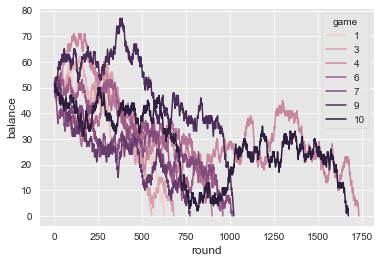

In [45]:
# gamler's ruin simulation
class GamblerRuin:

    def __init__(self, p, i, N):
        self.p = p
        self.i = i
        self.N = N
        self.bal = i
        self.q = 1 - self.p

    def gamble(self):
        sim_results = {}
        
        while self.bal > 0 and self.bal < self.N:
            outcome = np.random.uniform(0, 1)
            if outcome < self.p:
                self.bal +=1 
            else:
                self.bal -= 1
            sim_results[outcome] = [self.bal]
        result = pd.DataFrame.from_dict(sim_results, orient='index').reset_index().rename(columns={'index':'outcome', 0:'balance'})
        return result

    def n_simulations(self, games=100):
      self.df_outcome = pd.DataFrame()

      for game in np.arange(1,games+1):
        self.bal = self.i
        res = self.gamble()
        res['game'] = game
        res = res.reset_index(drop=False).rename(columns={'index':'round'})
        res['round'] = res['round'] + 1
        self.df_outcome = pd.concat([self.df_outcome, res[['game', 'round', 'balance']]], axis=0)

      return self.df_outcome


gambler = GamblerRuin(9/19, 50, 100)  # p = 9/19, n = 50, total = 100
gambler.n_simulations(10)
sns.lineplot(data=gambler.n_simulations(10), x='round', y='balance', hue='game')

It is this last fact that constitutes the ‘Gambler’s Ruin’ phenomenon: However large an
integer N you choose, if you make enough tosses, you will eventually hit −N. Put another
way, no matter how much money the gambler initially brings to the table, if he stays there
long enough, he will lose it all.

### References:

[Random Walks from MIT Lecture Notes](https://web.mit.edu/neboat/Public/6.042/randomwalks.pdf)